In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [18]:
df = pd.read_csv('data_raw.csv')

In [19]:
# cek missing value
df.isna().sum()

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [20]:
#cek dimensi data
df.shape

(699, 10)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [22]:
#cek jumlah kelas kolom target
df["Class"].unique()

array([2, 4])

In [23]:
#cek deskripsi statistik data
df.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [24]:
#cek balance data
df["Class"].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

In [25]:
def distribusi(data):
    
    num_kolom = len(data.columns)
    num_rows = (num_kolom + 4)//5
    num_rows = min(15, num_rows)

    fig,axes = plt.subplots(num_rows, 5, figsize=(30, 20))
    
    for i, kolom in enumerate(data.columns):
        row = i //5
        col = i % 5
        sns.histplot(data[kolom], kde=True, ax=axes[row, col])
        #axes[row,col].set_title(kolom)
    
    for i in range(num_kolom, num_rows * 5):
        row = i // 5
        col = i % 5
        fig.delaxes(axes[row, col])
    
    fig.suptitle('Distribusi untuk Setiap Kolom', y=1.02)


    plt.tight_layout()
    plt.show()

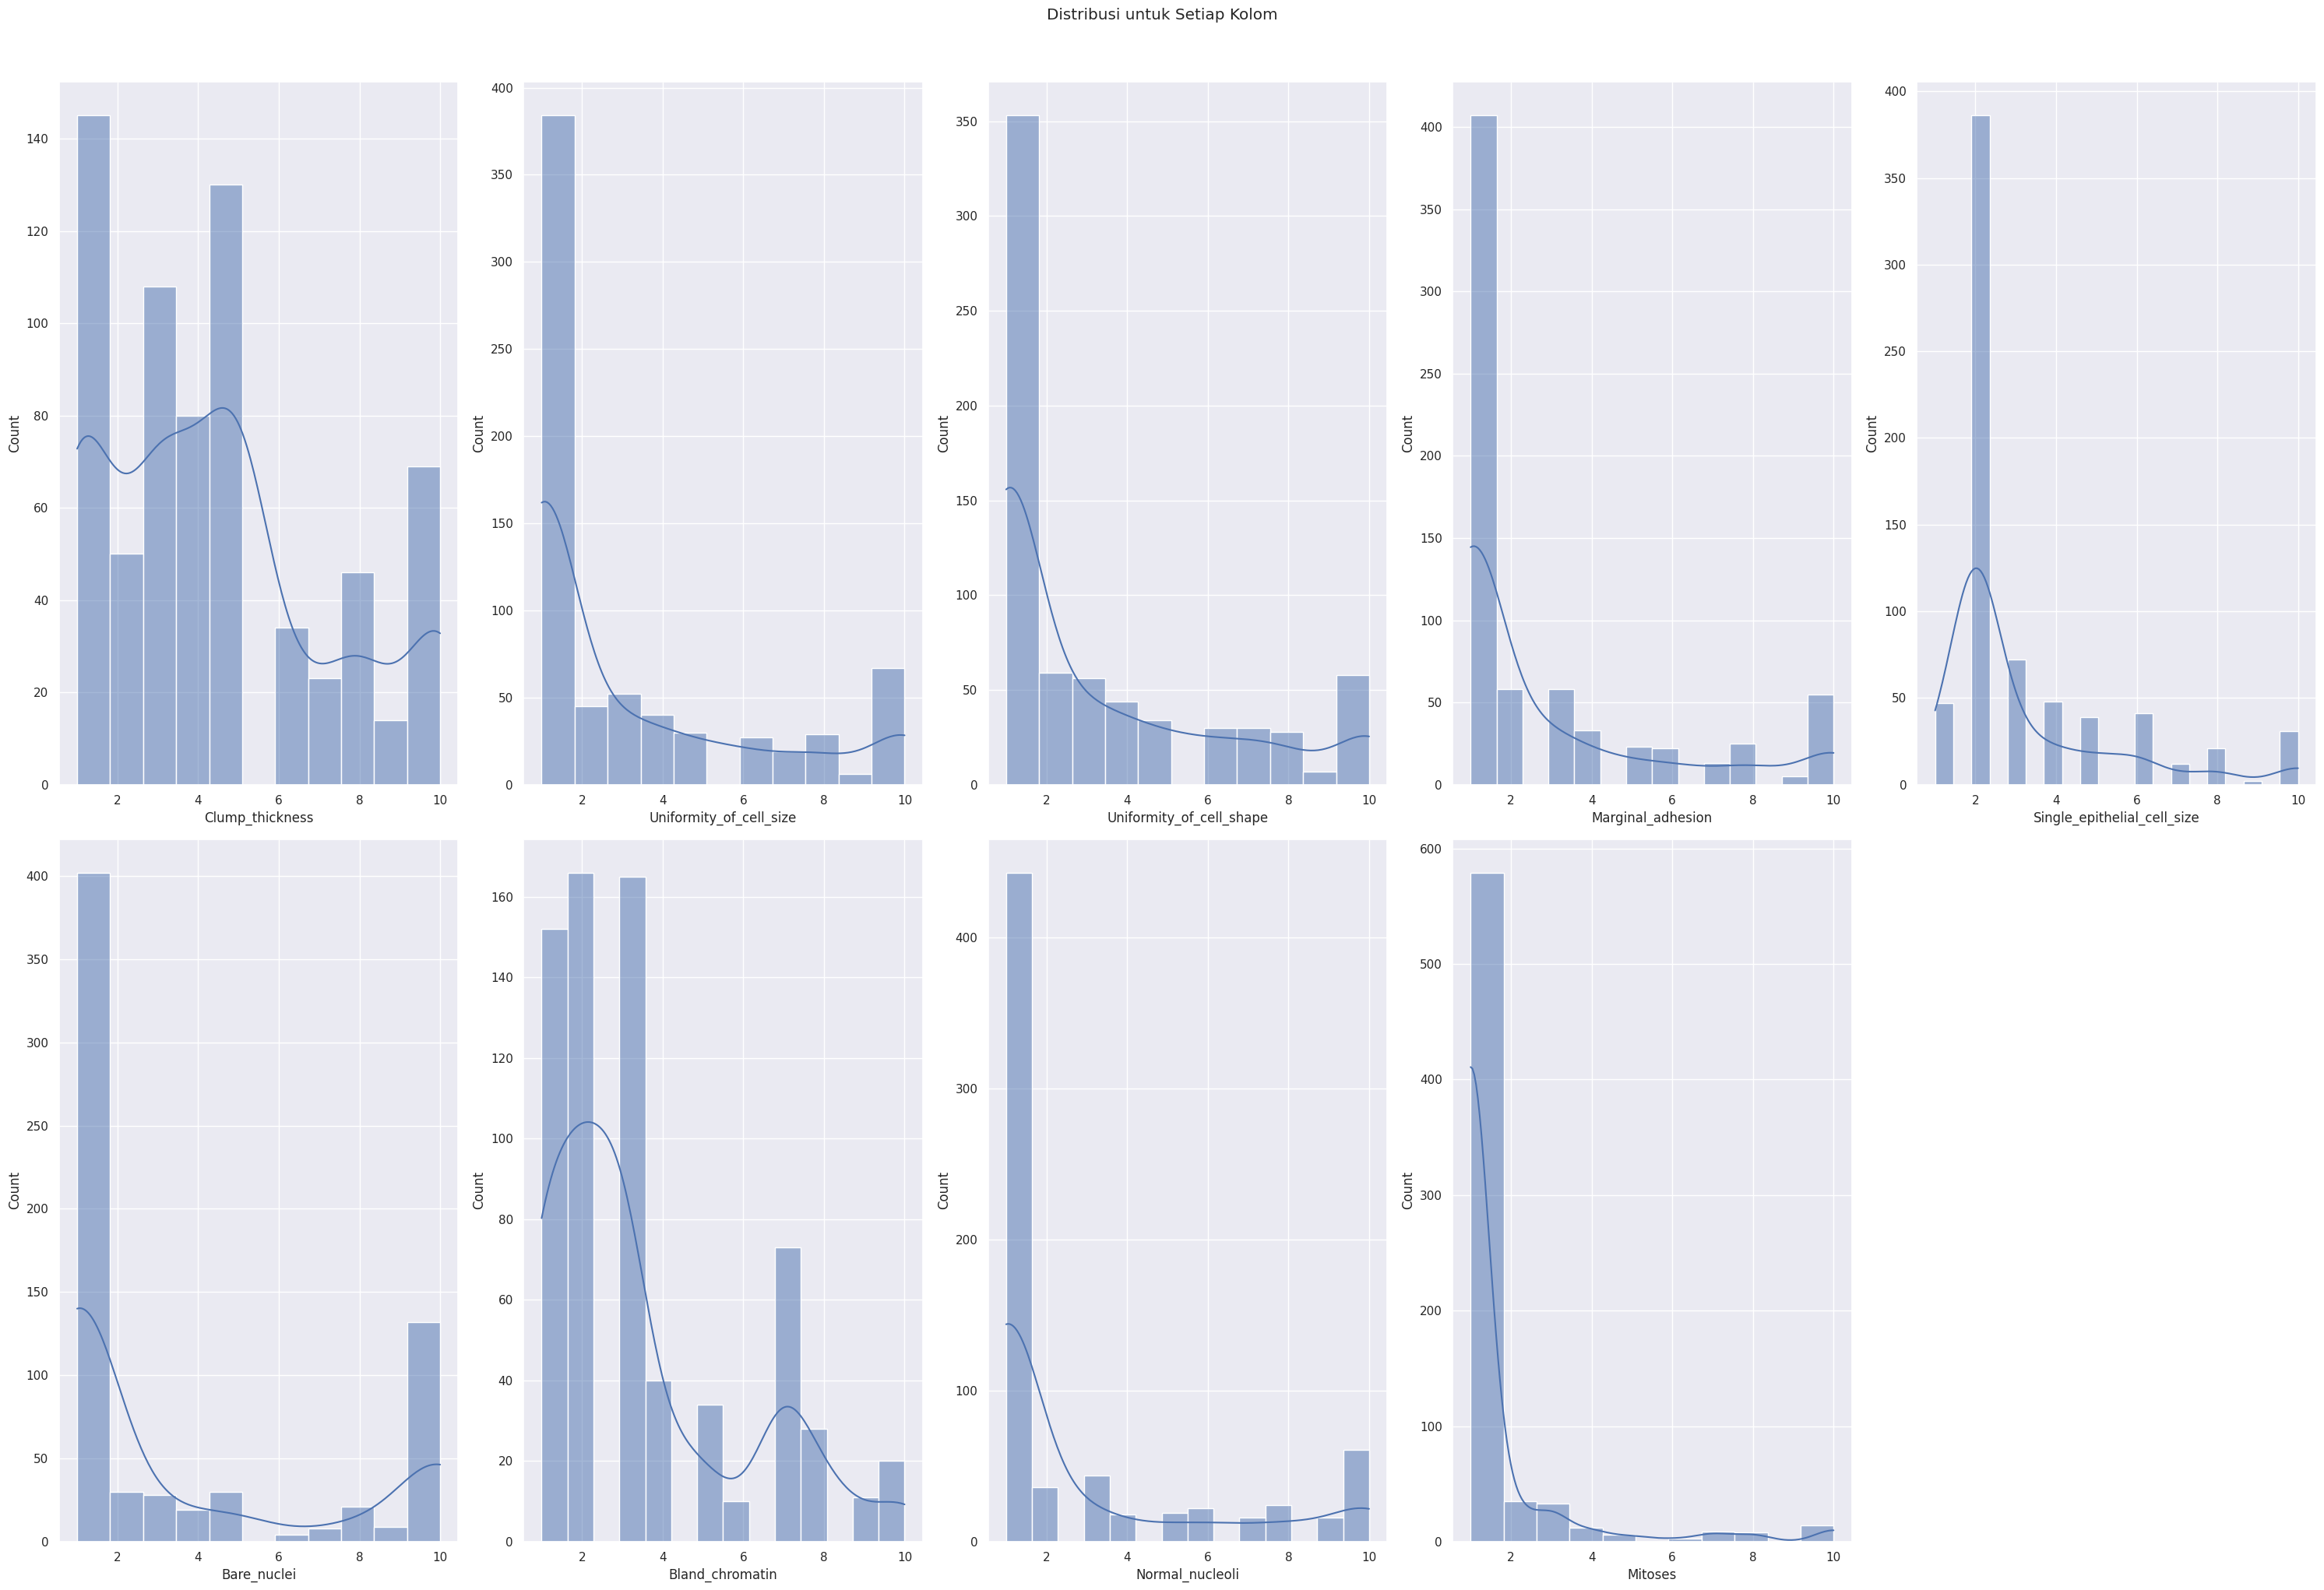

In [26]:
distribusi(df[df.columns[:-1]])
#cek distribusi data setiap fitur

In [30]:
#isi data kosong Bare_nuclei
mean_bare = df["Bare_nuclei"].mean()
df["Bare_nuclei"]=df['Bare_nuclei'].fillna(mean_bare)

In [32]:
#cek kembali data kosong
df.isna().sum()

Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [33]:
#cek korelasi setipa fitur dengan class
from scipy.stats import f_oneway
data_ = df.copy()
dictio_korelasi = {}
for kolom in data_.columns[:-1]:
   
    group = [data_[kolom][data_["Class"]==value] for value in data_["Class"].unique()]
    f_statistic, p_value = f_oneway(*group)
    
    dictio_korelasi[kolom]= p_value

dictio_korelasi

{'Clump_thickness': 6.835565528041274e-111,
 'Uniformity_of_cell_size': 1.747924499906326e-169,
 'Uniformity_of_cell_shape': 2.9456211578478854e-170,
 'Marginal_adhesion': 1.1097566828535813e-102,
 'Single_epithelial_cell_size': 4.346160495522652e-97,
 'Bare_nuclei': 4.1890044636765435e-168,
 'Bland_chromatin': 9.849140270228689e-131,
 'Normal_nucleoli': 3.124155254339221e-109,
 'Mitoses': 9.682098004464964e-32}

In [34]:
def box_plot(data): #fungsi boxplot
    sns.set(rc={'figure.figsize':(38,10)})
    melted_data = pd.melt(data, value_vars=data.columns[:-1], var_name="variabel", value_name="value")
    ax = sns.boxplot(x="variabel",y="value",data=melted_data)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()

/tmp/ipykernel_3376/1637873670.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


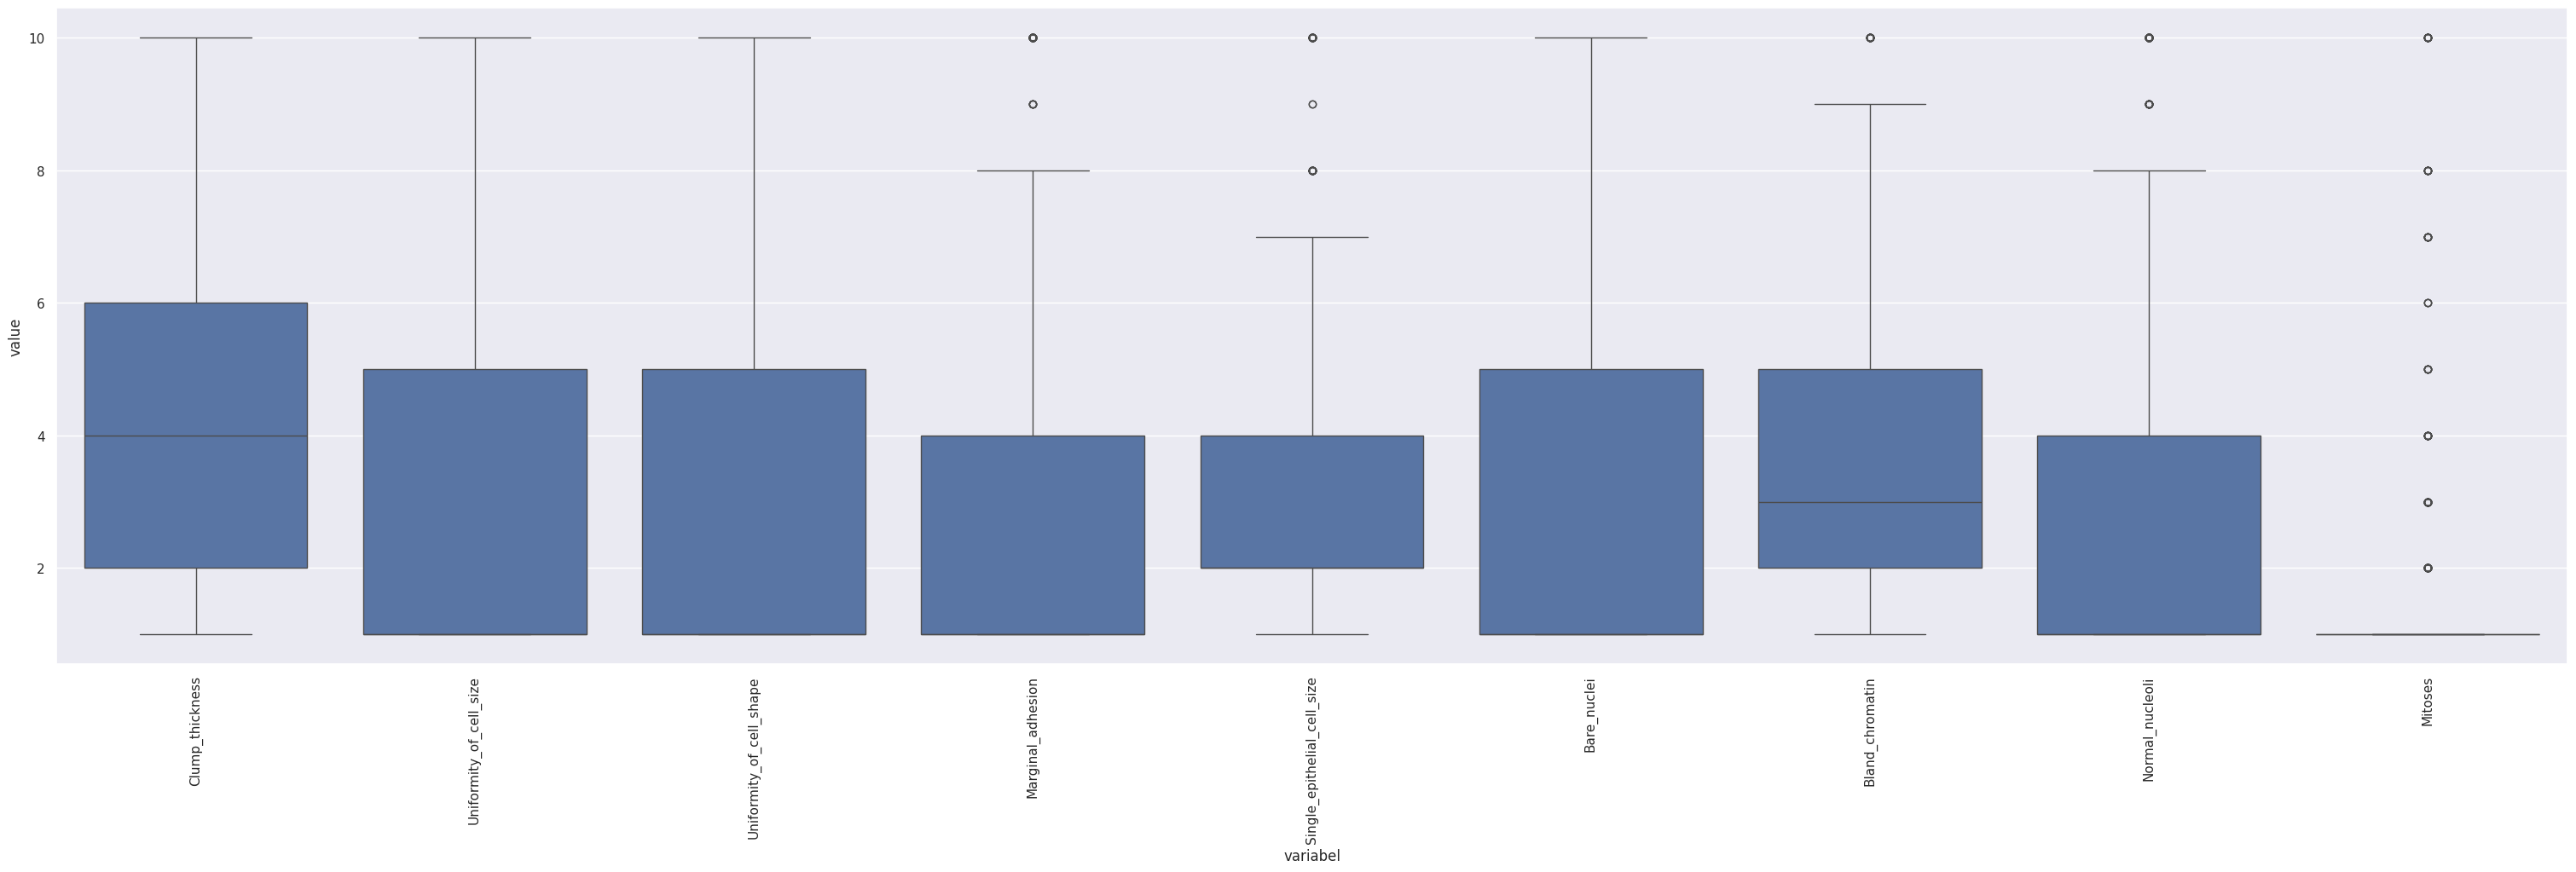

In [35]:
#cek outliers
box_plot(df)

In [36]:
#Min Max scaler
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
df_no_class = df[df.columns[:-1]]
target = df.Class
data_norm = norm.fit_transform(df_no_class)

In [37]:
#convert data to data frame
data_post = pd.DataFrame(data=data_norm,columns=df.columns[:-1])
data_post["Class"] = target
data_post

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000,2
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.000000,2
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.000000,2
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.000000,2
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...
694,0.222222,0.000000,0.000000,0.000000,0.222222,0.111111,0.000000,0.000000,0.000000,2
695,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,2
696,0.444444,1.000000,1.000000,0.222222,0.666667,0.222222,0.777778,1.000000,0.111111,4
697,0.333333,0.777778,0.555556,0.333333,0.222222,0.333333,1.000000,0.555556,0.000000,4


In [38]:
#save data
data_post.to_csv("data_post.csv",index=False)